<a href="https://colab.research.google.com/github/VictoriaOG1/Machine-Learning/blob/main/Eigenfaces_con_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
from matplotlib import pyplot as plt
from PIL import Image #Procesamiento Digital de IMágenes
import numpy as np

# 1.Dataset

In [13]:
if not os.path.exists('lfwcrop_grey'):
    !wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
    !unzip 'lfwcrop_grey.zip'

filenames = []
images = []

for filename in os.listdir('lfwcrop_grey/faces'):
    filenames.append(filename)
    image = np.array(Image.open(os.path.join('lfwcrop_grey/faces', filename)))
    images.append(image)

images = np.array(images)

print('Total Number of Faces: {}'.format(len(images)))
print(images.shape)
n = 64*64 #dimensión de mis datos (original) n = 4096 features
X = images.reshape(13233, n) # m = 13233 ejemplos de entrenamiento
print(X.shape)


Total Number of Faces: 13233
(13233, 64, 64)
(13233, 4096)


# 2.Visualización del Dataset

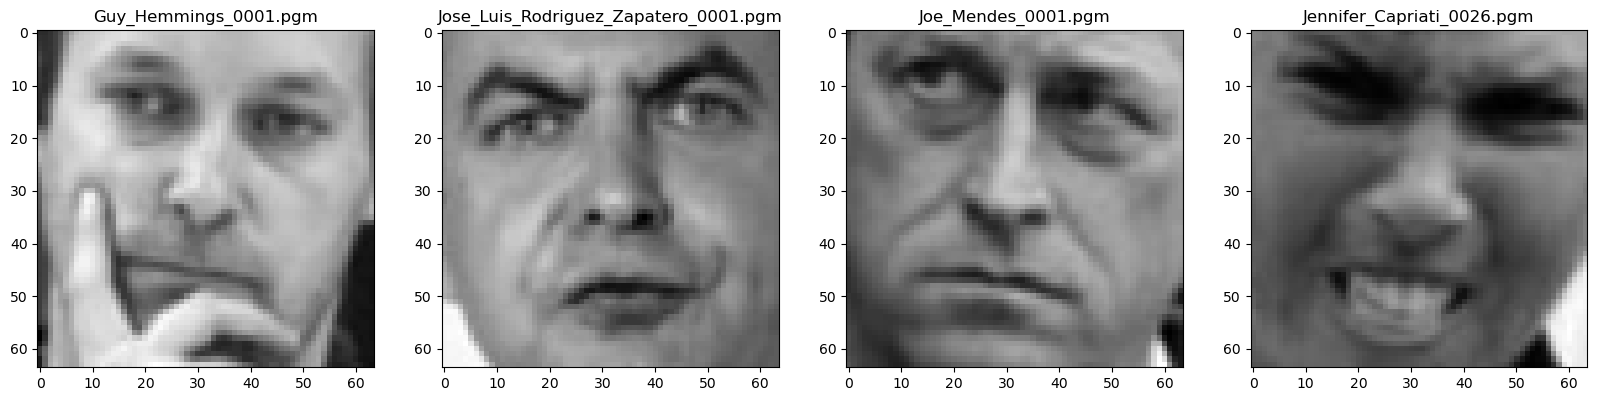

In [14]:
plt.figure(figsize=(20, 10))
num_images = 4
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    index = np.random.choice(range(len(images)))
    image = images[index]
    filename=filenames[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

# 3.Compresión de imágenes de rostros con PCA

In [15]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
explained_variance = 0.99 #varianza retenida =  varianza explicada = "información" retenida
pca = PCA(explained_variance) #solo construyo el objeto pca
pca.fit(X) #Implementa [U, S, V] = svd(Sigma); Ureduce = U(:,1:k) (ver diapositvas). Selecciona automáticamente k de modo que se retenga 99% de la varianza . Fit solo se hace en el training set.
#puede demorar unos minutos

PCA(n_components=0.99)

In [16]:
z = pca.transform(X) # Implementa z = Ureduce'*x (ver diapositivas). En algebra lineal Ureduce o U son matrices de rotación
Ureduce = pca.components_.T #Ureduce nxk
K = pca.n_components_ #número de componentes correspondientes a la varianza retenida
print("Los datos originales tienen dimensión", X.shape)
print("Los datos comprimidos tienen dimensión", z.shape)
print("El número de componentes principales K es", K, " que retienen el ", explained_variance*100, "% de la varianza")
print("El tam. de Ureduce (matriz de eigenvectors) es", Ureduce.shape)
print("PCA consigue reducir el tamaño en disco al ", K/n*100, "% de su tam. original")

Los datos originales tienen dimensión (13233, 4096)
Los datos comprimidos tienen dimensión (13233, 577)
El número de componentes principales K es 577  que retienen el  99.0 % de la varianza
El tam. de Ureduce (matriz de eigenvectors) es (4096, 577)
PCA consigue reducir el tamaño en disco al  14.0869140625 % de su tam. original


# 4.Visualizando los eigenvectors (Ureduce-> EigenFaces)

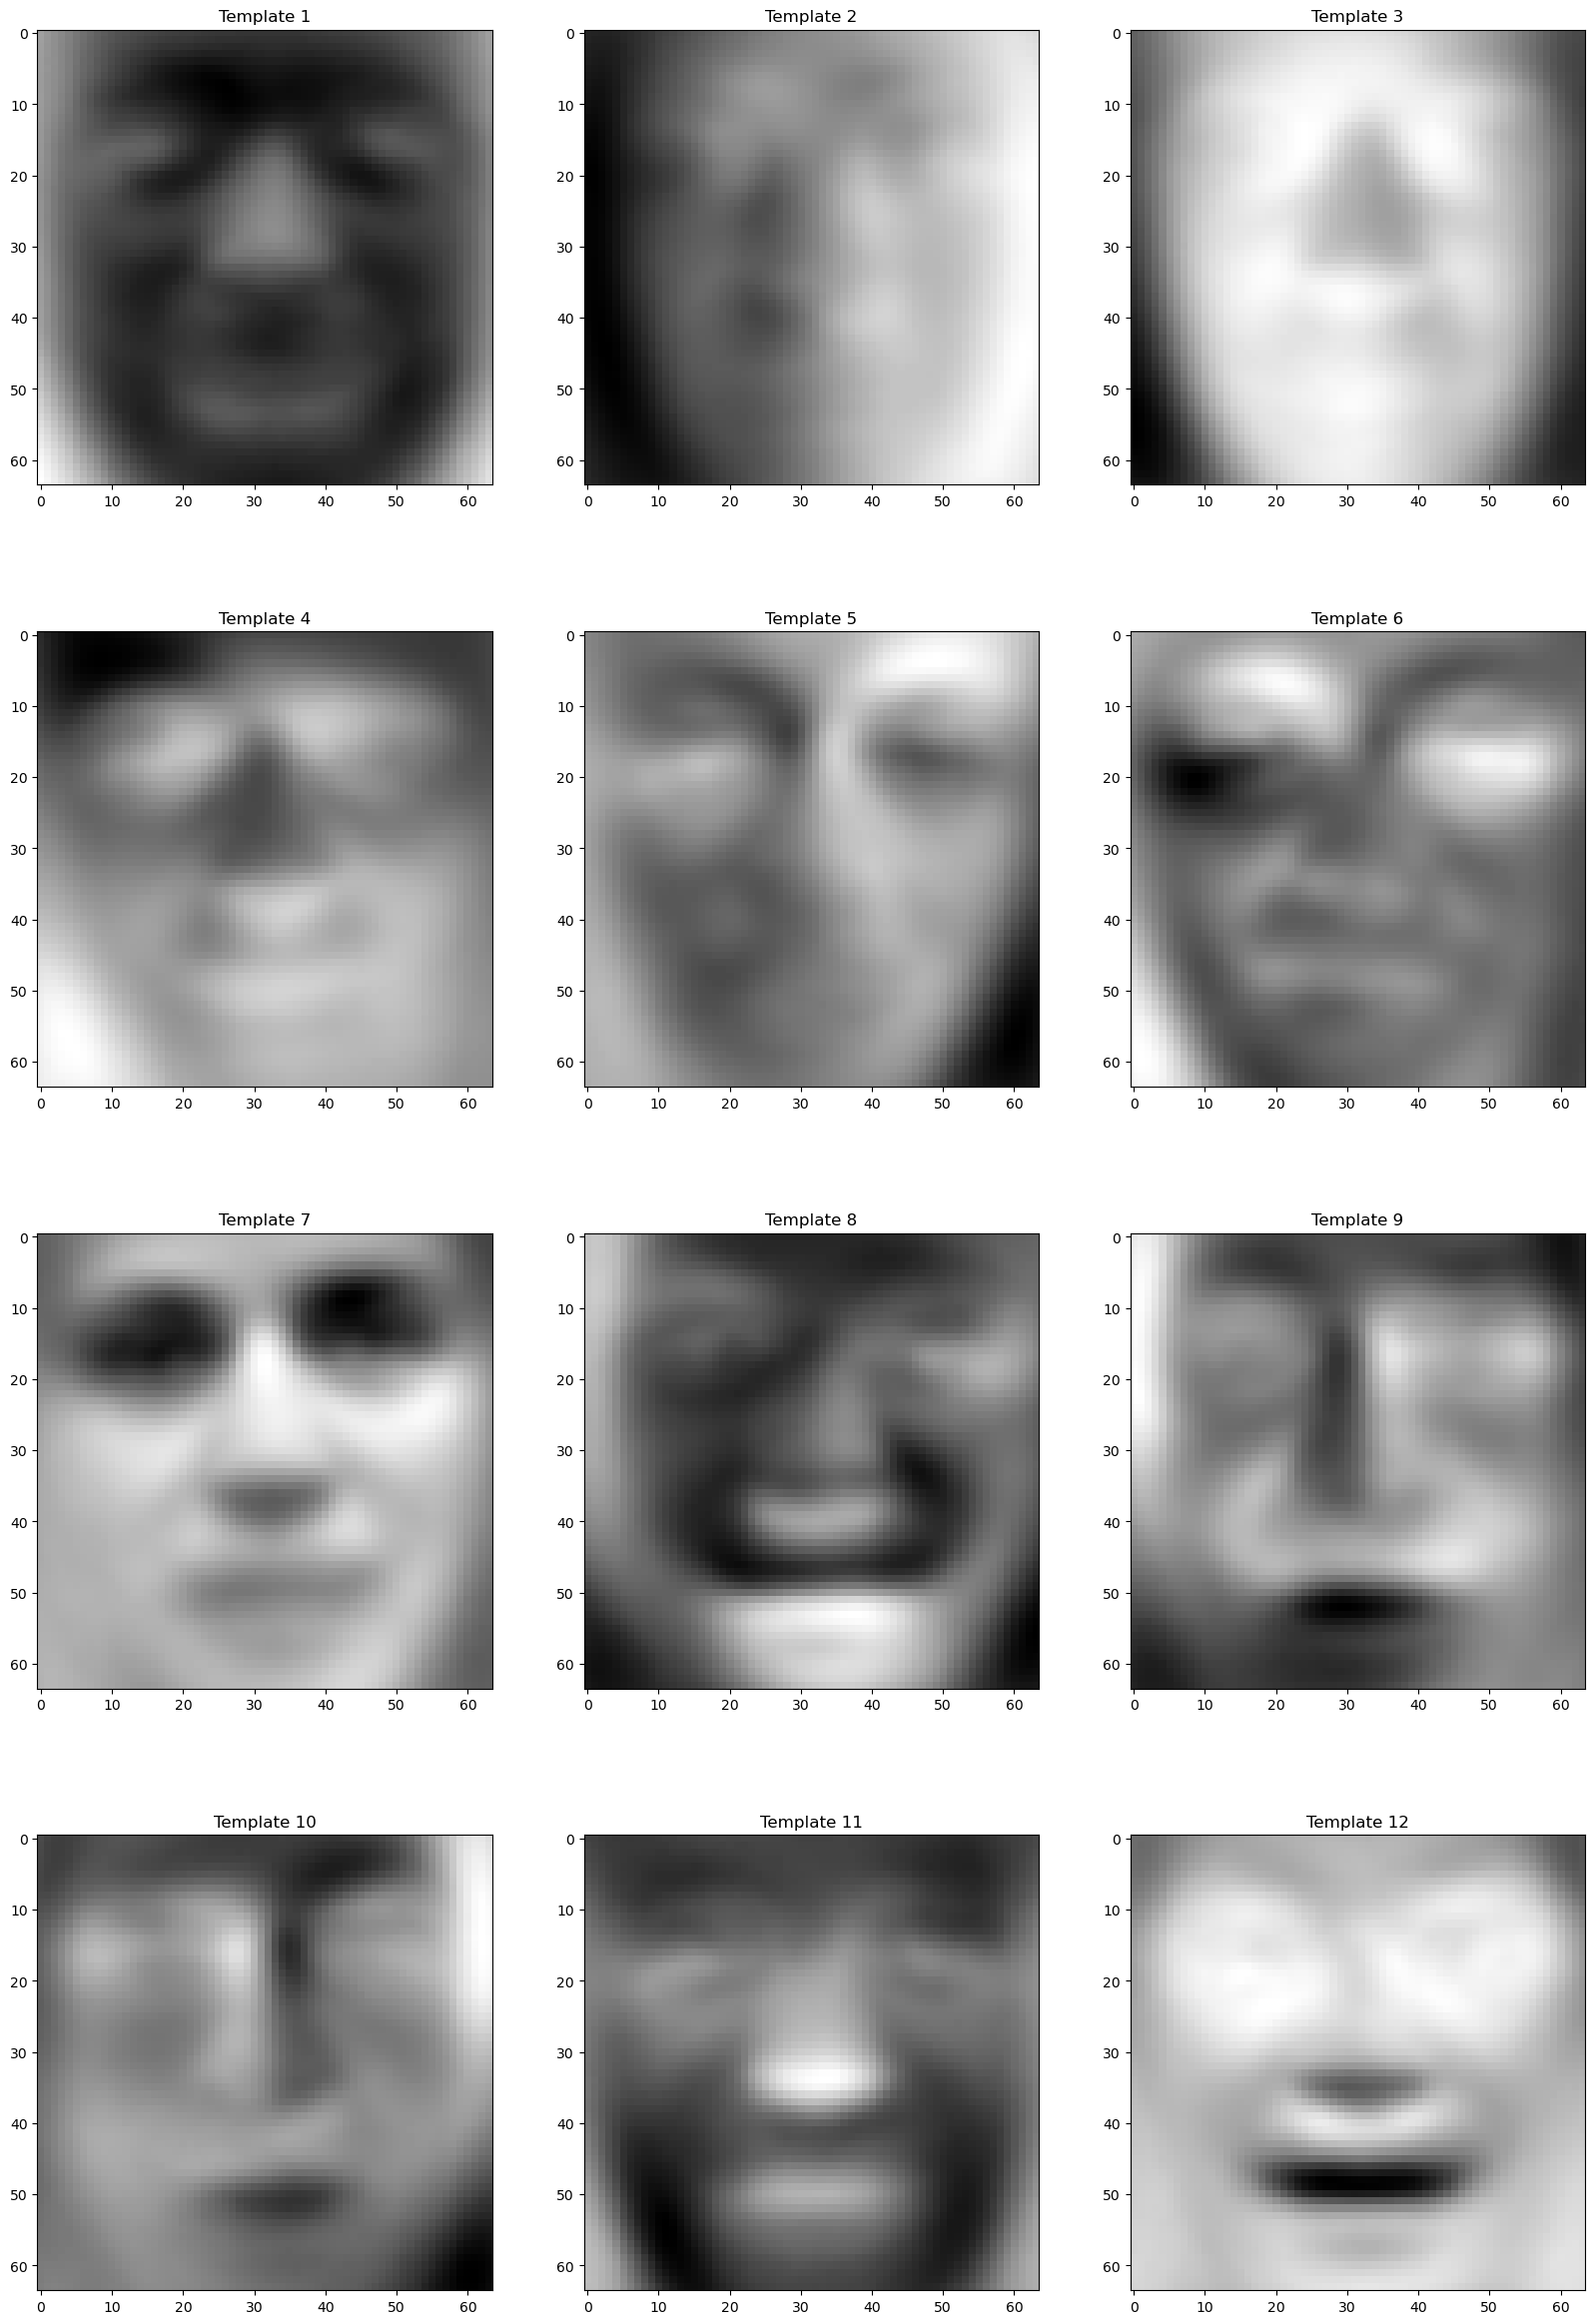

In [17]:
EigenFaces = Ureduce.reshape(64, 64, K) #Eigenfaces = Eigen + Faces.  Eigenvector = vector propio (forman un espacio vectorial)

plt.figure(figsize=(20, 30))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(EigenFaces[:,:,i], 'gray')
    plt.title('Template {}'.format(i+1))

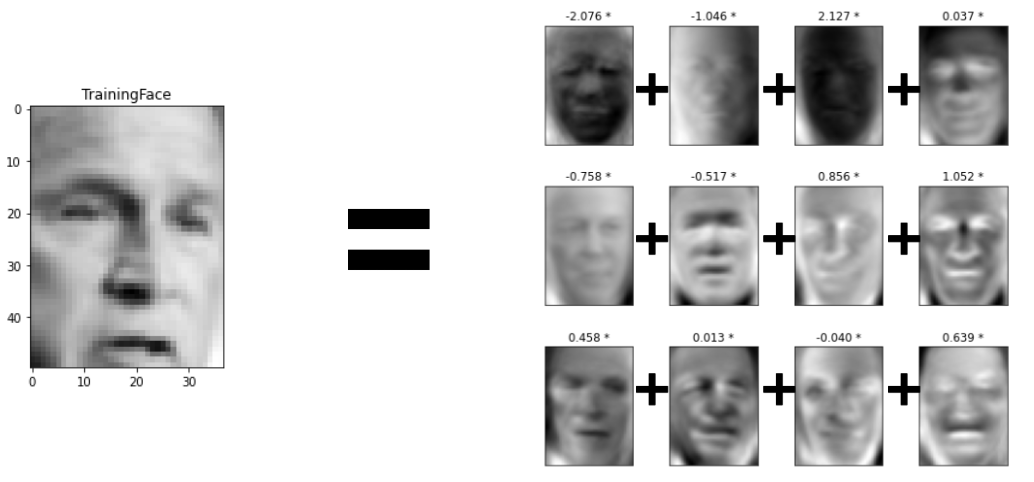

# 5.Reconstrucción de imagenes de rostros

Label Jean_Chretien_0035.pgm


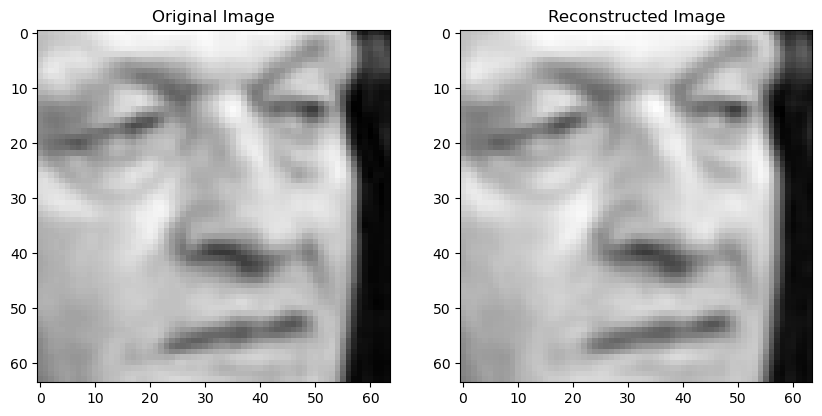

In [18]:
import random
random.seed(a=877)

#Implementa x_approx = Ureduce*z
X_approx = pca.inverse_transform(z) #transformada KL

# índice de la imagen a graficar
index = random.randint(0,13233)
reconstructed_image = X_approx[index]
reconstructed_image = reconstructed_image.reshape(64, 64)

print('Label {}'.format(filenames[index]))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(images[index], 'gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, 'gray')

# 6.Actividades 
Todas las actividades tienen el mismo puntaje

## 6.1 Varianza retenida vs número de componentes

Grafique la varianza retenida en función del número de componentes principales retenidos k. Para esto, modifique la variable `explained_variance` con los siguientes valores: 0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7. 
Para cada valor, verifique el número de componentes principales retenidos k.

Text(0.5, 1.0, 'Varianza retenida en función del número de componentes principales retenidos k')

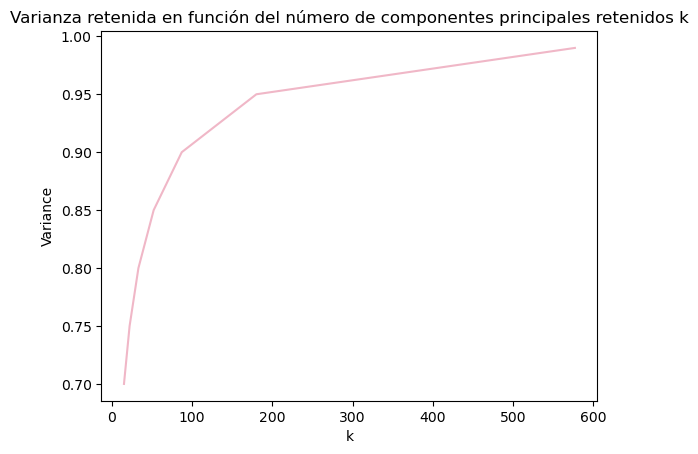

In [19]:
variance_array1 = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7]
k_array1 = []

for array_position1 in range(0,7):
    explained_variance1 = variance_array1[array_position1]
    pca1 = PCA(explained_variance1)
    pca1.fit(X)
    z1 = pca1.transform(X) 
    K1 = pca1.n_components_ #número de componentes correspondientes a la varianza retenida
    k_array1.append(K1)

plt.xlabel("k")
plt.ylabel("Variance")
plt.plot(k_array1, variance_array1, color='#f0b7c7')
plt.title(label="Varianza retenida en función del número de componentes principales retenidos k")

## 6.2 Compresión y calidad de la imagen

Grafique el porcentaje de compresión dado por k/n en función del número de componentes retenidos k. Para esto, modifique la variable `explained_variance` con los siguientes valores: 0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7.  Para cada valor, verifique el número de componentes princiaples retenidos k.

Por otro lado, para cada valor de k, grafique un rostro para ver la pérdida de calidad a medida que el número de componentes k disminuye.




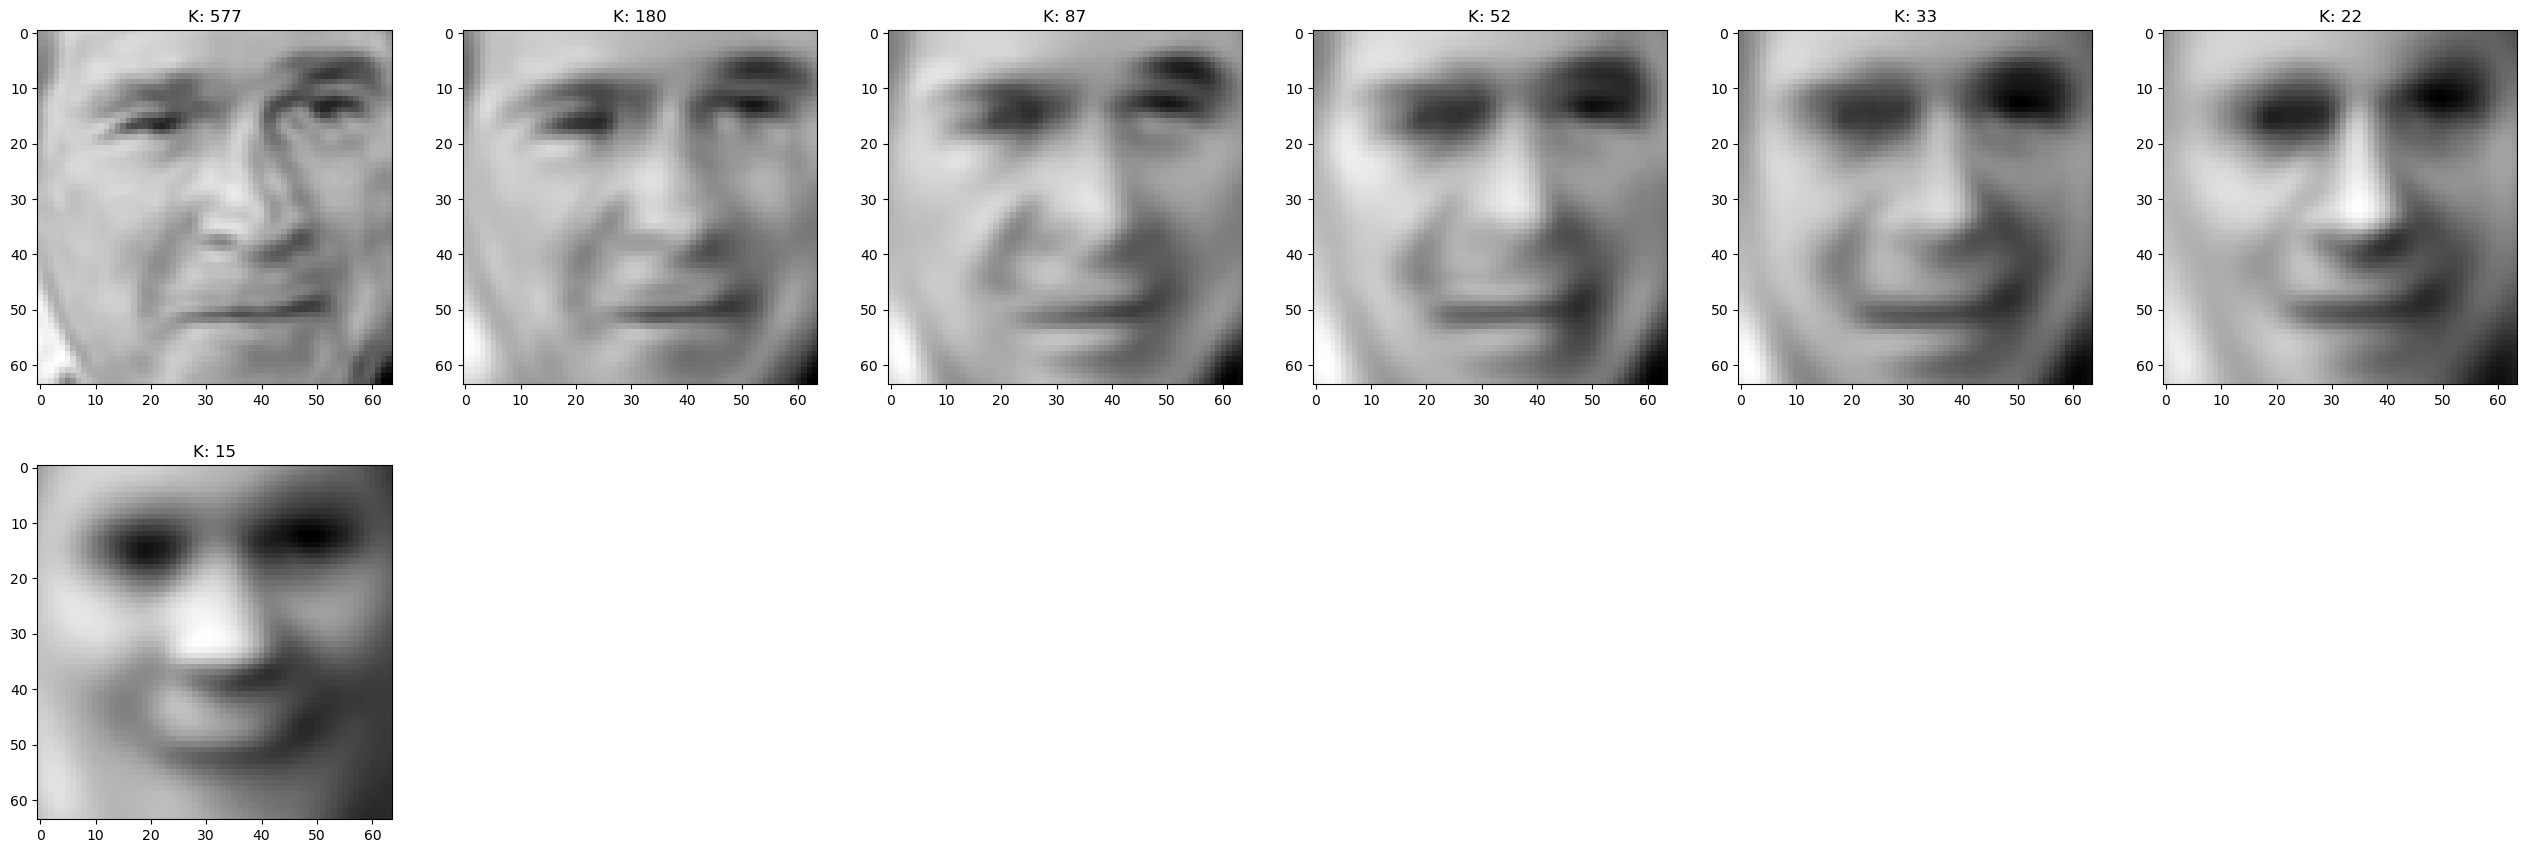

In [20]:
variance_array2 = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7]
k_array2 = []
porcentage_array2 = []
index = np.random.choice(range(len(X)))

plt.figure(figsize=(4*8, 2*8))
for array_position2 in range(0,7):
    explained_variance2 = variance_array2[array_position2]
    pca2 = PCA(explained_variance2)
    pca2.fit(X)
    z2 = pca2.transform(X) 
    K2 = pca2.n_components_ #número de componentes correspondientes a la varianza retenida
    k_array2.append(K2)
    porcentage_array2.append((K2/n)*100)

    title = "K: "
    title += str(K2)
    subplot=plt.subplot(3, 6, (array_position2)+1)
    subplot.set_title(title)
    X_approx2 = pca2.inverse_transform(z2)
    image = X_approx2[index]
    image = image.reshape(64,64)
    plt.imshow(image, 'gray')

Text(0.5, 1.0, 'Porcentaje de compresion en función del numero de componentes principales retenidos k')

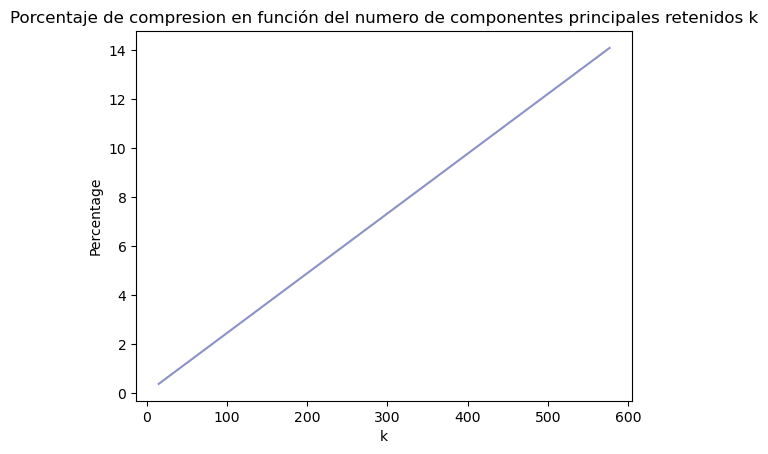

In [21]:
plt.figure()
plt.xlabel("k")
plt.ylabel("Percentage")
plt.plot(k_array2, porcentage_array2, color='#8c91c7')
plt.title(label="Porcentaje de compresion en función del numero de componentes principales retenidos k")

## 6.3 Proyectar mi rostro en los Eigenfaces

Tomar una imagen suya y "proyectarla" (transformarla) en los Eigenfaces. Recuerde que su rostro debe estar escalada a 64x64 pixeles y en formato pgm. No se olvide de realizar el reshape a 4096. Luego, reconstruir su imagen y graficar la original junto con la reconstruida. Para este apartado, retener 99% de la varianza

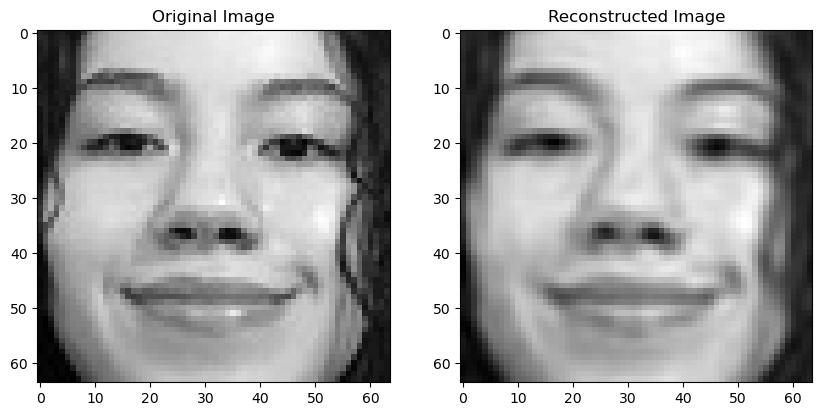

In [22]:
my_image_array = []

my_image = np.array(Image.open("PhotoAle_64.pgm"))
my_image_array.append(my_image)

my_image2 = np.array(Image.open("PhotoAle2_64.pgm"))
my_image_array.append(my_image2)

my_images = np.array(my_image_array)

my_images_reshaped = my_images.reshape(2,n)

my_z = pca.transform(my_images_reshaped)

my_images_reconstructed = pca.inverse_transform(my_z)
my_image_reconstructed = my_images_reconstructed[1]
my_image_reconstructed = my_image_reconstructed.reshape(64,64)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(my_image2, 'gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(my_image_reconstructed, 'gray')


## 6.4 Conclusiones

* El PCA es importante para la decorrelación por lo que ayuda a la reduccion de la dimensionalidad, el problema que surge como se puede ver en las imagenes anteriores es que se pierde la calidad de esta por la reducción

* Asimismo a medida que disminuye el porcentaje o en general el número de atributos retenidos disminuye la calidad de la imagen, es decir, se pierde mucho y la cara no es perceptible, lo que no es bueno. Como el numero de atributos retenido disminuye a medida que disminuye la varianza retenida hay que saber utilizar la varianza adecuada 